# problem statement:
*    

# Basic version :-

### data preprocessing

In [5]:
from shutil import copyfile
import os
import cv2
import zipfile
import random
import glob
import shutil
import pathlib

## importing Dataset

In [2]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2022-04-23 04:34:11--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 184.29.128.114, 2600:141b:f000:c8b::e59, 2600:141b:f000:c8e::e59
Connecting to download.microsoft.com (download.microsoft.com)|184.29.128.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   119MB/s    in 6.9s    

2022-04-23 04:34:18 (115 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [3]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

12501
12501


In [4]:
for path in pathlib.Path("/tmp/PetImages/Cat").iterdir():
    if path.is_file():
      old_name = path.stem
      old_extension = path.suffix
      directory = path.parent
      new_name = "c" + old_name + old_extension
      path.rename(pathlib.Path(directory, new_name))

In [ ]:
for i in os.listdir('/temp/images/images'):
     for img in random.sample(glob.glob(f'/tmp/PetImages/{i}/*'), ):
       try:
         shutil.move(img, f'/tmp/dataset1')
       except(Exception):
         pass


In [ ]:
import os
#providing the path of the folder
#r = raw string literal
folder_path = (r'/temp/images/images')
#using listdir() method to list the files of the folder
test = os.listdir(folder_path)
#taking a loop to remove all the images
#using ".png" extension to remove only png images
#using os.remove() method to remove the files
for images in test:
    if images.endswith(".jpg"):
        pass
    else:
      os.remove(os.path.join(folder_path, images))

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Conv2D,MaxPooling2D,UpSampling2D,Input,BatchNormalization,LeakyReLU
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.random import set_seed
import tensorflow as tf

set_seed(123)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)
set_seed(2)
np.random.seed(1)

print(len(os.listdir('/tmp/img_dataset')))

25002


In [ ]:
len(os.listdir('/tmp/dataset1'))

595

In [ ]:
image_dir = "/tmp/dataset1/"
height=200
width=200

In [ ]:
def image_pre_processing(path):
    X_img=[]
    y_img=[]
    for image in os.listdir(image_dir):
        try:
            img = cv2.imread(image_dir + image)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
            img = img.astype(np.float32)
            img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
            img_lab_rs = cv2.resize(img_lab, (width, height)) # resize image to network input size
            img_l = img_lab_rs[:,:,0] # pull out L channel
            #img_l -= 50 # subtract 50 for mean-centering
            img_ab = img_lab_rs[:,:,1:]#Extracting the ab channel
            img_ab = img_ab/128
            #The true color values range between -128 and 128. This is the default interval 
            #in the Lab color space. By dividing them by 128, they too fall within the -1 to 1 interval.
            X_img.append(img_l)
            y_img.append(img_ab)
        except:
            pass
    print(X_img)
    X_img = np.array(X_img)
    y_img = np.array(y_img)
    
    return X_img,y_img

In [ ]:
X_,y_ = image_pre_processing(image_dir) # Data-preprocessing
X_train ,X_val, y_train, y_val = train_test_split(X_,y_, test_size=0.15, random_state=42)

[array([[100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       ...,
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]], dtype=float32), array([[100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       ...,
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]], dtype=float32), array([[100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       ...,
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]], dtype=float32), array([[100.

In [ ]:
K.clear_session()
def InstantiateModel(in_):
    model_ = Conv2D(16,(3,3),padding='same',strides=1)(in_)
    model_ = LeakyReLU()(model_)
    #model_ = Conv2D(64,(3,3), activation='relu',strides=1)(model_)
    model_ = Conv2D(32,(3,3),padding='same',strides=1)(model_)
    model_ = LeakyReLU()(model_)
    model_ = BatchNormalization()(model_)
    model_ = MaxPooling2D(pool_size=(2,2),padding='same')(model_)
    
    model_ = Conv2D(64,(3,3),padding='same',strides=1)(model_)
    model_ = LeakyReLU()(model_)
    model_ = BatchNormalization()(model_)
    model_ = MaxPooling2D(pool_size=(2,2),padding='same')(model_)
    
    model_ = Conv2D(128,(3,3),padding='same',strides=1)(model_)
    model_ = LeakyReLU()(model_)
    model_ = BatchNormalization()(model_)
    
    model_ = Conv2D(256,(3,3),padding='same',strides=1)(model_)
    model_ = LeakyReLU()(model_)
    model_ = BatchNormalization()(model_)
    
    model_ = UpSampling2D((2, 2))(model_)
    model_ = Conv2D(128,(3,3),padding='same',strides=1)(model_)
    model_ = LeakyReLU()(model_)
    model_ = BatchNormalization()(model_)
    
    model_ = UpSampling2D((2, 2))(model_)
    model_ = Conv2D(64,(3,3), padding='same',strides=1)(model_)
    model_ = LeakyReLU()(model_)
    #model_ = BatchNormalization()(model_)
    
    concat_ = concatenate([model_, in_]) 
    
    model_ = Conv2D(64,(3,3), padding='same',strides=1)(concat_)
    model_ = LeakyReLU()(model_)
    model_ = BatchNormalization()(model_)
    
    model_ = Conv2D(32,(3,3),padding='same',strides=1)(model_)
    model_ = LeakyReLU()(model_)
    #model_ = BatchNormalization()(model_)
    
    model_ = Conv2D(2,(3,3), activation='tanh',padding='same',strides=1)(model_)

    return model_

In [ ]:
Input_Sample = Input(shape=(height, width,1))
Output_ = InstantiateModel(Input_Sample)
Model_Colourization = Model(inputs=Input_Sample, outputs=Output_)

In [ ]:
LEARNING_RATE = 0.001
Model_Colourization.compile(optimizer=Adam(lr=LEARNING_RATE),loss='mean_squared_error')
Model_Colourization.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 200, 200, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 200, 200, 16  0           ['conv2d[0][0]']                 
                                )                                                             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
def GenerateInputs(X_,y_):
    for i in range(len(X_)):
        X_input = X_[i].reshape(1,200,200,1)
        y_input = y_[i].reshape(1,200,200,2)
        yield (X_input,y_input)

In [ ]:
Model_Colourization.fit(GenerateInputs(X_,y_),epochs=50,verbose=1,steps_per_epoch=20,shuffle=True,validation_data=GenerateInputs(X_val, y_val))

Epoch 1/50
20/20 [==============================] - 29s 1s/step - loss: 5.6242e-04
Epoch 2/50
20/20 [==============================] - 29s 1s/step - loss: 2.4577e-04
Epoch 3/50
20/20 [==============================] - 29s 1s/step - loss: 6.7275e-04
Epoch 4/50
20/20 [==============================] - 29s 1s/step - loss: 1.5190e-04
Epoch 5/50
20/20 [==============================] - 29s 1s/step - loss: 1.8647e-04
Epoch 6/50
20/20 [==============================] - 29s 1s/step - loss: 1.5591e-04
Epoch 7/50
20/20 [==============================] - 29s 1s/step - loss: 2.4380e-04
Epoch 8/50
20/20 [==============================] - 29s 1s/step - loss: 1.6422e-04
Epoch 9/50
20/20 [==============================] - 30s 1s/step - loss: 6.3246e-05
Epoch 10/50
20/20 [==============================] - 29s 1s/step - loss: 4.0573e-05
Epoch 11/50
20/20 [==============================] - 29s 1s/step - loss: 4.3443e-05
Epoch 12/50
20/20 [==============================] - 29s 1s/step - loss: 2.4083e-05
E

In [ ]:
def ExtractTestInput(image_dir):
    img = cv2.imread(ImagePath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_ = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    img_ = cv2.cvtColor(img_, cv2.COLOR_RGB2Lab)
    img_=img_.astype(np.float32)
    img_lab_rs = cv2.resize(img_, (width, height)) # resize image to network input size
    img_l = img_lab_rs[:,:,0] # pull out L channel
    #img_l -= 50
    img_l_reshaped = img_l.reshape(1,200,200,1)
    
    return img_l_reshaped

In [ ]:
TestImagePath = '/tmp/dataset1/'
ImagePath=TestImagePath+"10027.jpg"
image_for_test = ExtractTestInput(ImagePath)
Prediction = Model_Colourization.predict(image_for_test)
Prediction = Prediction*128
Prediction=Prediction.reshape(200,200,2)

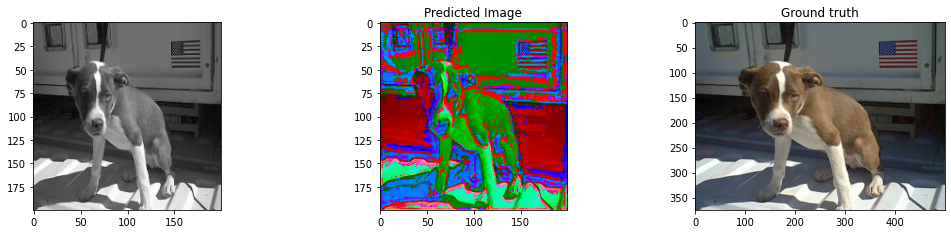

In [ ]:
plt.figure(figsize=(30,20))
plt.subplot(5,5,1)
img = cv2.imread(TestImagePath+"10027.jpg")
img_1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img_1, cv2.COLOR_RGB2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
img = cv2.resize(img, (200, 200))
plt.imshow(img)

plt.subplot(5,5,1+1)
img_ = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
img_[:,:,1:] = Prediction
img_ = cv2.cvtColor(img_, cv2.COLOR_Lab2RGB)
plt.title("Predicted Image")
plt.imshow(img_)

plt.subplot(5,5,1+2)
plt.title("Ground truth")
plt.imshow(img_1)

# improved version :   ***Inception_resnet_v2***

### loading "**Cats and Dogs Breeds Classification Oxford Dataset**" dataset from kaggle

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d zippyz/cats-and-dogs-breeds-classification-oxford-dataset

 99% 776M/780M [00:08<00:00, 133MB/s]
100% 780M/780M [00:08<00:00, 100MB/s]


In [ ]:
zip_ref = zipfile.ZipFile('/content/cats-and-dogs-breeds-classification-oxford-dataset.zip','r')
zip_ref.extractall('/temp')
zip_ref.close()

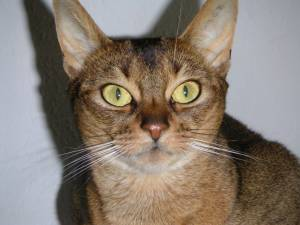

(225, 300, 3)


In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread('/temp/images/images/Abyssinian_216.jpg')
cv2_imshow(img)
print(img.shape)

In [ ]:
print(len(os.listdir('/temp/images/images')))

7393


In [ ]:
os.mkdir('/temp/dataset')
os.mkdir('/temp/dataset/train')
os.mkdir('/temp/dataset/test')

In [ ]:
#! rm -rf '/content/dataset.zip'

In [ ]:
import pandas as pd
train_set = pd.read_csv('/temp/annotations/annotations/trainval.txt', delimiter=' ')
test_set = pd.read_csv('/temp/annotations/annotations/test.txt',delimiter=' ')
train_set.columns = ['image','ID','species','breed_ID']
test_set.columns = ['image','ID','species','breed_ID']

In [ ]:
train_set.head()

,image,ID,species,breed_ID
0,Abyssinian_101,1,1,1
1,Abyssinian_102,1,1,1
2,Abyssinian_103,1,1,1
3,Abyssinian_104,1,1,1
4,Abyssinian_105,1,1,1


In [ ]:
test_set.head()

,image,ID,species,breed_ID
0,Abyssinian_202,1,1,1
1,Abyssinian_204,1,1,1
2,Abyssinian_205,1,1,1
3,Abyssinian_206,1,1,1
4,Abyssinian_207,1,1,1


In [ ]:
print(os.path.exists('/temp/images/images/Abyssinian_20.jpg'))

True


In [ ]:
print(test_set['image'].tolist())

['Abyssinian_202', 'Abyssinian_204', 'Abyssinian_205', 'Abyssinian_206', 'Abyssinian_207', 'Abyssinian_20', 'Abyssinian_210', 'Abyssinian_212', 'Abyssinian_213', 'Abyssinian_215', 'Abyssinian_216', 'Abyssinian_217', 'Abyssinian_219', 'Abyssinian_21', 'Abyssinian_220', 'Abyssinian_221', 'Abyssinian_223', 'Abyssinian_224', 'Abyssinian_225', 'Abyssinian_226', 'Abyssinian_228', 'Abyssinian_22', 'Abyssinian_230', 'Abyssinian_232', 'Abyssinian_24', 'Abyssinian_25', 'Abyssinian_26', 'Abyssinian_27', 'Abyssinian_29', 'Abyssinian_2', 'Abyssinian_30', 'Abyssinian_31', 'Abyssinian_32', 'Abyssinian_33', 'Abyssinian_36', 'Abyssinian_37', 'Abyssinian_3', 'Abyssinian_40', 'Abyssinian_43', 'Abyssinian_44', 'Abyssinian_45', 'Abyssinian_46', 'Abyssinian_47', 'Abyssinian_48', 'Abyssinian_49', 'Abyssinian_4', 'Abyssinian_50', 'Abyssinian_51', 'Abyssinian_52', 'Abyssinian_54', 'Abyssinian_55', 'Abyssinian_56', 'Abyssinian_57', 'Abyssinian_58', 'Abyssinian_5', 'Abyssinian_60', 'Abyssinian_61', 'Abyssinian_6

In [ ]:
import random 

In [ ]:
def split_data(source,destination,train_lst,test_lst):
  for image1 in train_lst:
    #print(os.path.exists(f'{source}{image}.jpg'))
    img_train = cv2.imread(f"{source}{image1}.jpg")
    img_train = cv2.resize(img_train,(400,400))
    cv2.imwrite(f"{destination}train/{image1}.jpg",img_train)
    #copyfile(source+image+'.jpg',destination+'train'+'/'+image+'.jpg')
  for image2 in test_lst:
    img_test = cv2.imread(f"{source}{image2}.jpg")
    img_test = cv2.resize(img_train,(400,400))
    cv2.imwrite(f"{destination}test/{image2}.jpg",img_test)

source = '/temp/images/images/'
destination = '/temp/dataset/'
train_lst = train_set['image'].tolist()
random.shuffle(test_set['image'].tolist())
test_lst = test_set['image'].tolist()

split_data(source,destination,train_lst,test_lst)

In [ ]:
print(len(os.listdir('/temp/dataset/train')))
print(len(os.listdir('/temp/dataset/test')))


3679
3668


In [ ]:
!zip -r "dataset.zip" "/temp/dataset"

Streaming output truncated to the last 5000 lines.
  adding: temp/dataset/test/Ragdoll_79.jpg (deflated 0%)
  adding: temp/dataset/test/basset_hound_36.jpg (deflated 0%)
  adding: temp/dataset/test/Bengal_90.jpg (deflated 0%)
  adding: temp/dataset/test/pomeranian_191.jpg (deflated 0%)
  adding: temp/dataset/test/staffordshire_bull_terrier_3.jpg (deflated 0%)
  adding: temp/dataset/test/shiba_inu_79.jpg (deflated 0%)
  adding: temp/dataset/test/boxer_34.jpg (deflated 0%)
  adding: temp/dataset/test/boxer_93.jpg (deflated 0%)
  adding: temp/dataset/test/american_bulldog_91.jpg (deflated 0%)
  adding: temp/dataset/test/beagle_197.jpg (deflated 0%)
  adding: temp/dataset/test/american_pit_bull_terrier_95.jpg (deflated 0%)
  adding: temp/dataset/test/keeshond_48.jpg (deflated 0%)
  adding: temp/dataset/test/Birman_96.jpg (deflated 0%)
  adding: temp/dataset/test/american_pit_bull_terrier_63.jpg (deflated 0%)
  adding: temp/dataset/test/beagle_66.jpg (deflated 0%)
  adding: temp/dataset/tes

# Model Training

In [14]:
import tensorflow
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose, Input, Reshape,concatenate
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import TensorBoard 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import RepeatVector, Permute
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, gray2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf

In [7]:
os.mkdir("/tmp/dataset2")
os.mkdir("/tmp/dataset2/train")
os.mkdir("/tmp/dataset2/test")

In [ ]:
for img in random.sample(glob.glob(f'/tmp/PetImages/Cat/*'),11000 ):
  try:
    shutil.move(img, f'/tmp/dataset2/train')
  except(Exception):
    pass
for img in random.sample(glob.glob(f'/tmp/PetImages/Dog/*'),11000 ):
  try:
    shutil.move(img, f'/tmp/dataset2/train')
  except(Exception):
    pass

In [10]:
print(len(os.listdir("/tmp/dataset2/train")))

22000


In [15]:
X = []
for filename in os.listdir('/tmp/dataset2/train/'):
  #print(f'/temp/dataset/train/{filename}')
  X.append(img_to_array(load_img('/tmp/dataset2/train/'+filename)))

UnidentifiedImageError: ignored

In [16]:
len(X)

4342

In [ ]:
X = np.array(X, dtype=float)
Xtrain = 1.0/255*X

In [ ]:
#Load weights
inception = InceptionResNetV2(weights='imagenet', include_top=True)
inception.graph = tf.get_default_graph() 

In [ ]:
embed_input = Input(shape=(1000,))

#Encoder
encoder_input = Input(shape=(256, 256, 1,))
encoder_output = Conv2D(64, (3,3), activation='relu', padding='same', strides=2)(encoder_input)
encoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(128, (3,3), activation='relu', padding='same', strides=2)(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same', strides=2)(encoder_output)
encoder_output = Conv2D(512, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(512, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)

#Fusion
fusion_output = RepeatVector(32 * 32)(embed_input) 
fusion_output = Reshape(([32, 32, 1000]))(fusion_output)
fusion_output = concatenate([encoder_output, fusion_output], axis=3) 
fusion_output = Conv2D(256, (1, 1), activation='relu', padding='same')(fusion_output) 

#Decoder
decoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(fusion_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
decoder_output = Conv2D(64, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
decoder_output = Conv2D(32, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = Conv2D(16, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = Conv2D(2, (3, 3), activation='tanh', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)

model = Model(inputs=[encoder_input, embed_input], outputs=decoder_output)

In [ ]:
def create_inception_embedding(grayscaled_rgb):
    grayscaled_rgb_resized = []
    for i in grayscaled_rgb:
        i = resize(i, (299, 299, 3), mode='constant')
        grayscaled_rgb_resized.append(i)
    grayscaled_rgb_resized = np.array(grayscaled_rgb_resized)
    grayscaled_rgb_resized = preprocess_input(grayscaled_rgb_resized)
    with inception.graph.as_default():
        embed = inception.predict(grayscaled_rgb_resized)
    return embed

# Image transformer
datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=20,
        horizontal_flip=True)

#Generate training data
batch_size = 10

def image_a_b_gen(batch_size):
    for batch in datagen.flow(X, batch_size=batch_size):
        grayscaled_rgb = gray2rgb(rgb2gray(batch))
        embed = create_inception_embedding(grayscaled_rgb)
        lab_batch = rgb2lab(batch)
        X_batch = lab_batch[:,:,:,0]
        X_batch = X_batch.reshape(X_batch.shape+(1,))
        Y_batch = lab_batch[:,:,:,1:] / 128
        yield ([X_batch, create_inception_embedding(grayscaled_rgb)], Y_batch)


#Train model      
model.compile(optimizer='rmsprop', loss='mse')
model.fit_generator(image_a_b_gen(batch_size), epochs=1, steps_per_epoch=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


ValueError: ignored

# Saving the model

In [ ]:
import os.path
if os.path.isfile("/content/drive/MyDrive/image classification(projects)/black&white to color/final_model.h5") is False:
  model.Save("/content/drive/MyDrive/image classification(projects)/black&white to color/final_model.h5")

In [3]:
# to load and use the saved model we use this code
from tensorflow.keras.models import load_model
saved_model = load_model("/content/drive/MyDrive/image classification(projects)/black&white to color/final_model.h5")

# Testing 

In [ ]:
color_me = []
for filename in os.listdir('Test/'):
    color_me.append(img_to_array(load_img('Test/'+filename)))
color_me = np.array(color_me, dtype=float)
gray_me = gray2rgb(rgb2gray(1.0/255*color_me))
color_me_embed = create_inception_embedding(gray_me)
color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))


# Test model
output = model.predict([color_me, color_me_embed])
output = output * 128

# Output colorizations
for i in range(len(output)):
    cur = np.zeros((256, 256, 3))
    cur[:,:,0] = color_me[i][:,:,0]
    cur[:,:,1:] = output[i]
    imsave("result/img_"+str(i)+".png", lab2rgb(cur))

In [ ]:
def img_testing():
  color_me = [img_to_array(load_img(''))]
  color_me = np.array(color_me, dtype=float)
  gray_me = gray2rgb(rgb2gray(1.0/255*color_me))
  color_me_embed = create_inception_embedding(gray_me)
  color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
  color_me = color_me.reshape(color_me.shape+(1,))